In [2]:
%matplotlib notebook
#Import Needed Modules
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Read the file
df_canada = pd.read_excel('Canada.xlsx',
                         sheet_name="Canada by Citizenship",
                         skiprows=range(20),
                         skipfooter=2)

In [4]:
# Get summary of dataframe
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
df_canada["Total"] = df_canada[range(1980,2014)].sum(axis=1)

In [6]:
df_canada_2 = df_canada.set_index('OdName')

In [7]:
df_canada_2.head()

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,15


In [8]:
#Filter by countries
#df_canada.OdName

In [9]:
years = list(map(str, range(1980, 2014)))

In [10]:
df_canada_2.columns = list(map(str, df_canada_2.columns)) # to prevent ambiguity between index numbers and column names

In [11]:
df_canada_2.sort_values(['Total'], ascending=False, axis=0, inplace=True)

In [12]:
df_canada_2

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,
India,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,8880,8670,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Immigrants,Foreigners,935,Asia,906,Eastern Asia,902,Developing regions,5123,6682,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Immigrants,Foreigners,908,Europe,924,Northern Europe,901,Developed regions,22045,24796,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,6051,5921,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,978,972,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Immigrants,Foreigners,905,Northern America,905,Northern America,901,Developed regions,9378,10030,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,1172,1429,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,185,371,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Immigrants,Foreigners,935,Asia,906,Eastern Asia,902,Developing regions,1011,1456,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [13]:
 # Create a total number of landed immigrants per year datasets
df_total = pd.DataFrame(df_canada_2[years].sum(axis=0)) # Get data for all years
df_total.index = map(float, df_total.index) # Change year to numerical so that regression can be performed
df_total.reset_index(inplace=True)# Get index to be row numbers
df_total.columns = ['year', 'total'] # Create column names



In [14]:
df_total.head() # Get Summary

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<IPython.core.display.Javascript object>


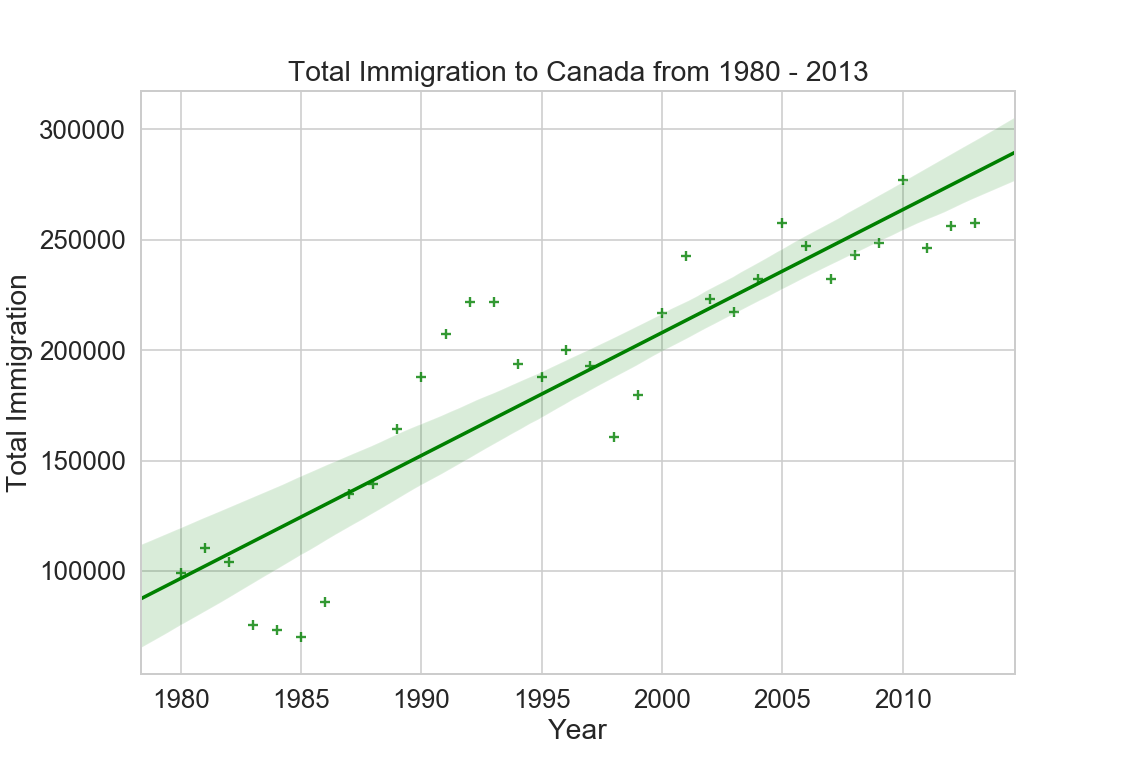

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

In [19]:
# Plot the regression with given data
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+')
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')